In [1]:
import numpy as np
import pandas as pd

In [15]:
df= pd.read_csv("C:/Users/dnyan/ML Assignments/Dataset/store_data.csv")

In [16]:
print(df.head())

           shrimp    almonds     avocado    vegetables mix green grapes  \
0         burgers  meatballs        eggs               NaN          NaN   
1         chutney        NaN         NaN               NaN          NaN   
2          turkey    avocado         NaN               NaN          NaN   
3   mineral water       milk  energy bar  whole wheat rice    green tea   
4  low fat yogurt        NaN         NaN               NaN          NaN   

  whole weat flour yams cottage cheese energy drink tomato juice  \
0              NaN  NaN            NaN          NaN          NaN   
1              NaN  NaN            NaN          NaN          NaN   
2              NaN  NaN            NaN          NaN          NaN   
3              NaN  NaN            NaN          NaN          NaN   
4              NaN  NaN            NaN          NaN          NaN   

  low fat yogurt green tea honey salad mineral water salmon antioxydant juice  \
0            NaN       NaN   NaN   NaN           NaN    NaN

In [17]:
# shape of the data
df.shape

(7500, 20)

In [18]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [19]:
# describing the data
df.describe()

,olive oil
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [22]:
df = df.drop(columns=['olive oil'])

# Convert each column into binary: 1 if item exists (non-null), 0 otherwise.
# We use .notnull() which returns True/False, then convert Boolean to integer (1/0)
df_binary = df.notnull().astype(int)

# Quick check of the preprocessed binary data
print("\nBinary Data Sample:")
print(df_binary.head())


Binary Data Sample:
   shrimp  almonds  avocado  vegetables mix  green grapes  whole weat flour  \
0       1        1        1               0             0                 0   
1       1        0        0               0             0                 0   
2       1        1        0               0             0                 0   
3       1        1        1               1             1                 0   
4       1        0        0               0             0                 0   

   yams  cottage cheese  energy drink  tomato juice  low fat yogurt  \
0     0               0             0             0               0   
1     0               0             0             0               0   
2     0               0             0             0               0   
3     0               0             0             0               0   
4     0               0             0             0               0   

   green tea  honey  salad  mineral water  salmon  antioxydant juice  \
0    

C:\Users\dnyan\AppData\Local\Temp\ipykernel_9076\1099801244.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')


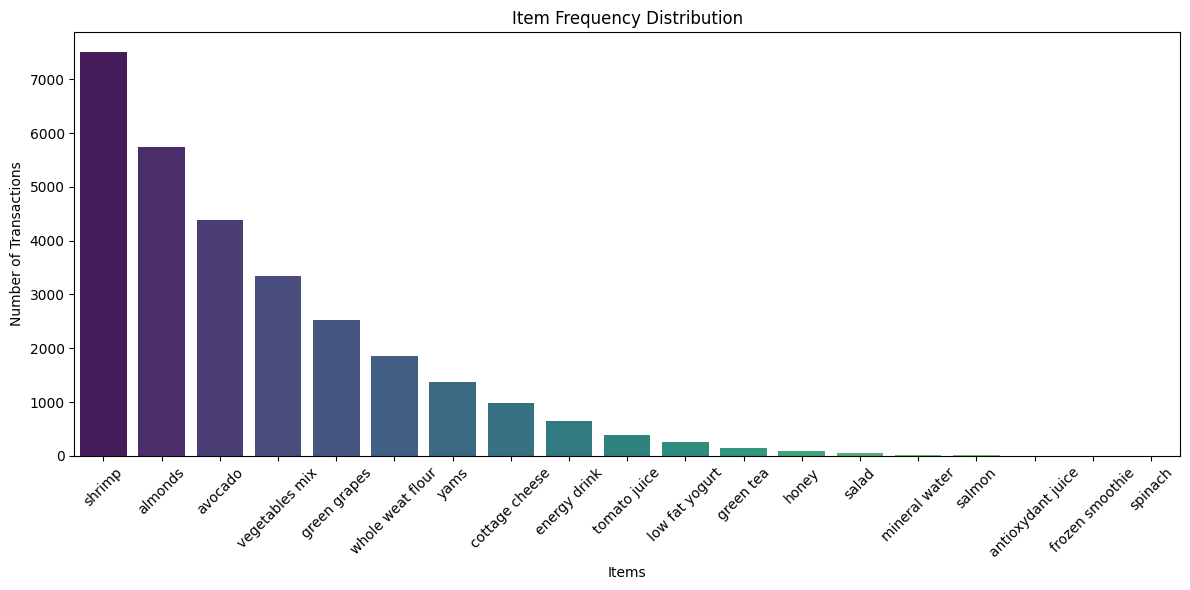

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum each column to count the number of transactions that include the item
item_counts = df_binary.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')
plt.title("Item Frequency Distribution")
plt.xlabel("Items")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


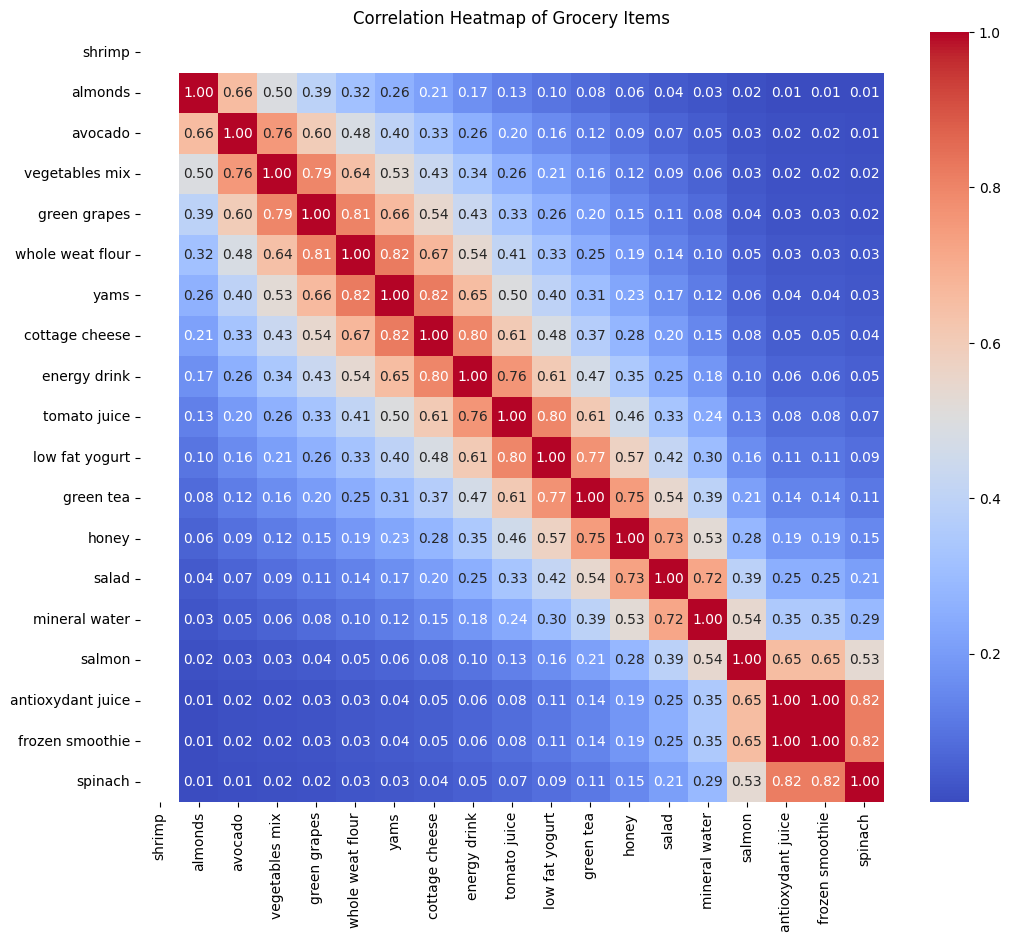

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_binary.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Grocery Items")
plt.show()


In [25]:
from mlxtend.frequent_patterns import apriori

# Calculate frequent itemsets with a minimum support threshold.
frequent_itemsets = apriori(df_binary, min_support=0.01, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets.sort_values(by="support", ascending=False).head())


C:\Users\dnyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
     support            itemsets
0   1.000000            (shrimp)
13  0.766133   (shrimp, almonds)
1   0.766133           (almonds)
14  0.585067   (shrimp, avocado)
25  0.585067  (almonds, avocado)


In [27]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with a minimum confidence threshold (adjust as needed).
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Sort the rules by lift for better insights.
rules_sorted = rules.sort_values(by="lift", ascending=False)
print("Top Association Rules:")
print(rules_sorted.head())


C:\Users\dnyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


Top Association Rules:
                                               antecedents  \
1233377                          (energy drink, green tea)   
1233378                                  (yams, green tea)   
846346   (avocado, green tea, almonds, energy drink, ve...   
846347   (green grapes, avocado, green tea, almonds, en...   
846348   (avocado, green tea, almonds, energy drink, ve...   

                                               consequents  \
1233377  (cottage cheese, shrimp, tomato juice, avocado...   
1233378  (cottage cheese, shrimp, tomato juice, avocado...   
846346         (honey, shrimp, tomato juice, green grapes)   
846347       (honey, shrimp, tomato juice, vegetables mix)   
846348                 (honey, shrimp, tomato juice, yams)   

         antecedent support  consequent support   support  confidence  \
1233377              0.0204            0.011467  0.011467    0.562092   
1233378              0.0204            0.011467  0.011467    0.562092   
846346      

C:\Users\dnyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


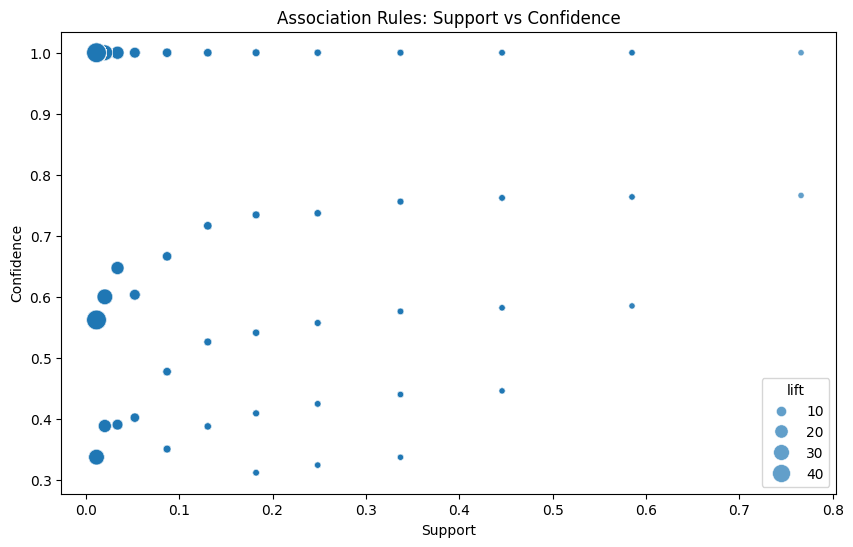

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", 
                data=rules, sizes=(20, 200), alpha=0.7)
plt.title("Association Rules: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()
